Explore The Data

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Import the data

It has been preliminarily processed before

In [2]:
df = pd.read_csv('Lending Club Updated Version.csv')

In [3]:
# take a look the first 3 rows in the dataset 
df.head(3)

,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
0,35000.0,60 months,13.58%,C,C2,Security Officer,7 years,MORTGAGE,160000.0,Source Verified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20000.0,36 months,5.31%,A,A1,Sr. Administrative Director,10+ years,MORTGAGE,339000.0,Source Verified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7000.0,36 months,11.98%,B,B5,Parole,< 1 year,MORTGAGE,40000.0,Verified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Understand the structure of the dataset  
df.shape

(107864, 85)

# Univariate Analysis

## Numerical Variables

### Subset the numerical features from dataset 

In [5]:
# Firstly, we should know that there are 88 features are numerical and 20 categorical features respectively.
df_type = pd.DataFrame(df.dtypes)
df_type.rename(columns={0:'data_type'},inplace=True)
df_type['data_type'].value_counts()

float64    65
object     20
Name: data_type, dtype: int64

In [6]:
# Subset the numerical columns
df_num = df.select_dtypes(include =['float64'])
df_num.shape

(107864, 65)

In [7]:
df_num.columns

Index(['loan_amnt', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'last_fico_range_high',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_il_tl',
       'num_tl_90

In [8]:
# Two kinds of data types in the dataset
df.dtypes.value_counts()

float64    65
object     20
dtype: int64

In [9]:
# list all the numerical variables 
num_variables = df.select_dtypes(include=['float64']).columns
num_variables

Index(['loan_amnt', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'last_fico_range_high',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_il_tl',
       'num_tl_90

In [10]:
num_variables = list(num_variables)
len(list(num_variables))

65

There are total 65 numerical variables in the dataset, so it would be appropriate to seperate them into 5 groups with 13 variables in each group. 

### The first group

array([[<AxesSubplot:title={'center':'annual_inc'}>,
        <AxesSubplot:title={'center':'delinq_2yrs'}>,
        <AxesSubplot:title={'center':'dti'}>,
        <AxesSubplot:title={'center':'fico_range_low'}>],
       [<AxesSubplot:title={'center':'inq_last_6mths'}>,
        <AxesSubplot:title={'center':'last_fico_range_high'}>,
        <AxesSubplot:title={'center':'loan_amnt'}>,
        <AxesSubplot:title={'center':'mths_since_last_delinq'}>],
       [<AxesSubplot:title={'center':'mths_since_last_record'}>,
        <AxesSubplot:title={'center':'open_acc'}>,
        <AxesSubplot:title={'center':'pub_rec'}>,
        <AxesSubplot:title={'center':'revol_bal'}>],
       [<AxesSubplot:title={'center':'total_acc'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

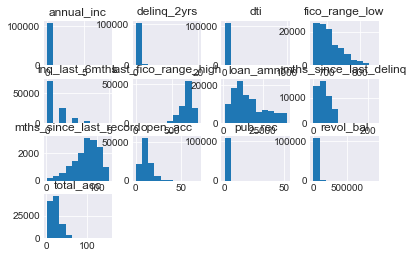

In [45]:
df_num[['loan_amnt', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'last_fico_range_high']].hist()

loan_amnt
mean is:  16147.94
std is:  10184.02
min is:  1000.0
max is:  40000.0
1% quantile value is: 1600.0
10% quantile value is: 5000.0
90% quantile value is: 32000.0
99% quantile value is: 40000.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


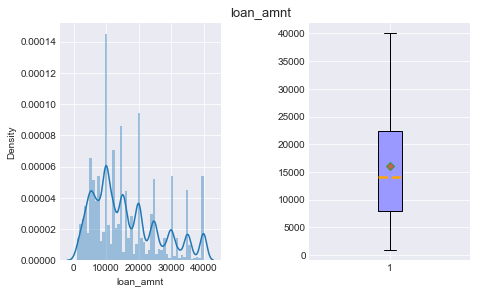

annual_inc
mean is:  78542.27
std is:  76874.36
min is:  0.0
max is:  8365188.0
1% quantile value is: 12607.560000000001
10% quantile value is: 32000.0
90% quantile value is: 135000.0
99% quantile value is: 283334.8499999958


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


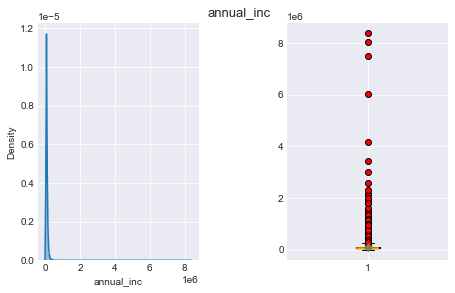

dti
mean is:  19.65
std is:  21.8
min is:  0.0
max is:  999.0
1% quantile value is: 1.0
10% quantile value is: 6.36
90% quantile value is: 32.32
99% quantile value is: 61.14970000000016


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


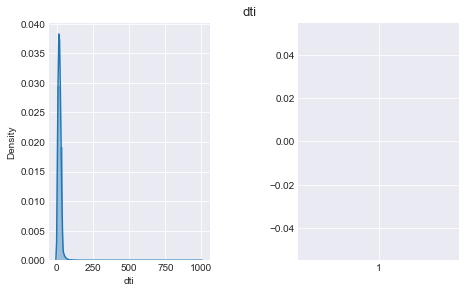

C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


delinq_2yrs
mean is:  0.22
std is:  0.73
min is:  0.0
max is:  20.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 1.0
99% quantile value is: 3.0


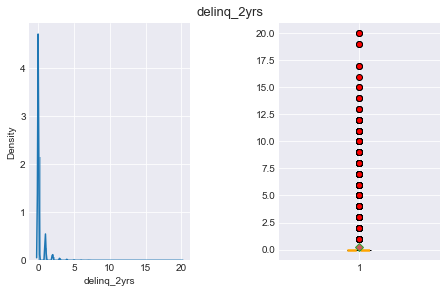

fico_range_low
mean is:  708.25
std is:  37.21
min is:  660.0
max is:  845.0
1% quantile value is: 660.0
10% quantile value is: 665.0
90% quantile value is: 760.0
99% quantile value is: 815.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


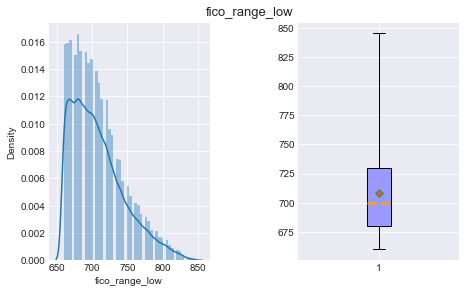

inq_last_6mths
mean is:  0.46
std is:  0.75
min is:  0.0
max is:  5.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 1.0
99% quantile value is: 3.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


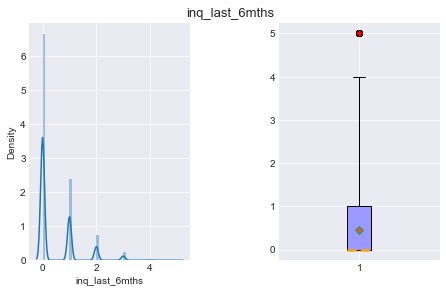

mths_since_last_delinq
mean is:  36.98
std is:  21.8
min is:  0.0
max is:  226.0
1% quantile value is: 3.0
10% quantile value is: 10.0
90% quantile value is: 69.0
99% quantile value is: 81.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


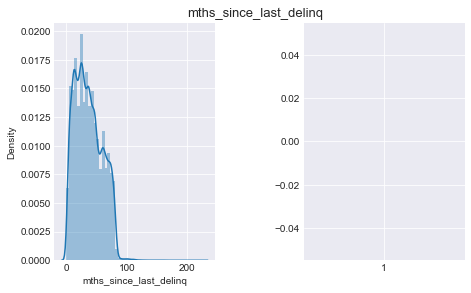

mths_since_last_record
mean is:  79.16
std is:  24.82
min is:  1.0
max is:  124.0
1% quantile value is: 10.0
10% quantile value is: 44.0
90% quantile value is: 108.0
99% quantile value is: 118.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


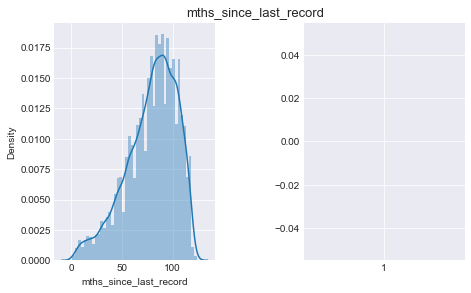

open_acc
mean is:  11.38
std is:  5.88
min is:  0.0
max is:  69.0
1% quantile value is: 2.0
10% quantile value is: 5.0
90% quantile value is: 19.0
99% quantile value is: 30.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


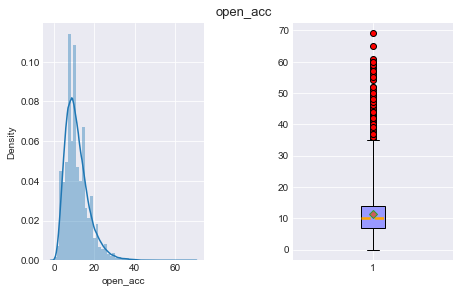

pub_rec
mean is:  0.16
std is:  0.49
min is:  0.0
max is:  52.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 1.0
99% quantile value is: 2.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


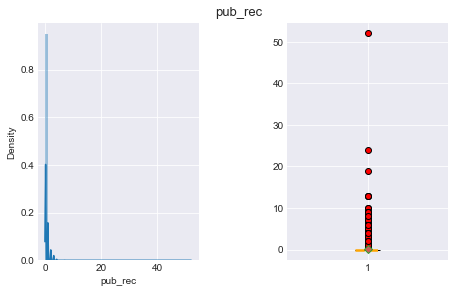

revol_bal
mean is:  16093.38
std is:  22176.26
min is:  0.0
max is:  925589.0
1% quantile value is: 0.0
10% quantile value is: 2055.0
90% quantile value is: 33423.0
99% quantile value is: 98626.31999999983


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


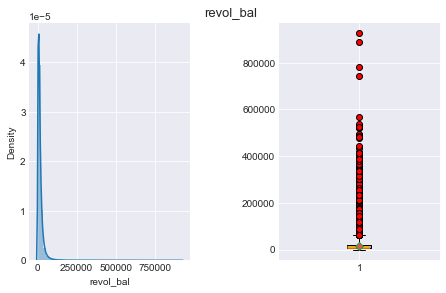

total_acc
mean is:  22.62
std is:  12.03
min is:  2.0
max is:  153.0
1% quantile value is: 4.0
10% quantile value is: 9.0
90% quantile value is: 39.0
99% quantile value is: 60.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


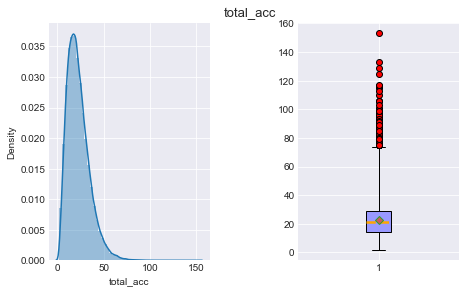

last_fico_range_high
mean is:  699.52
std is:  75.76
min is:  0.0
max is:  850.0
1% quantile value is: 499.0
10% quantile value is: 579.0
90% quantile value is: 789.0
99% quantile value is: 829.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


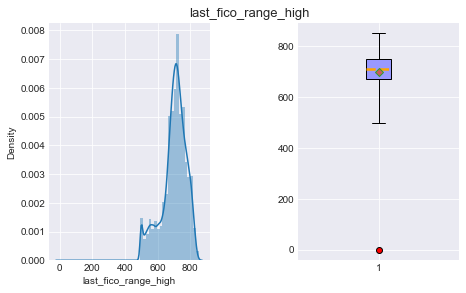

In [11]:
for col in num_variables[0:13]:
    print(col)
    print("mean is: ", round(df[col].mean(),2))
    print("std is: ", round(df[col].std(), 2))
    print("min is: ", df[col].min())
    print("max is: ", df[col].max())
    print("1% quantile value is:", df[col].quantile(.01))
    print("10% quantile value is:", df[col].quantile(.1))
    print("90% quantile value is:", df[col].quantile(.9))
    print("99% quantile value is:", df[col].quantile(.99))
    plt.style.use('seaborn-darkgrid')
    fig, (ax1, ax2) = plt.subplots(1, 2)
    #ax = np.reshape(ax, (1, 2))
    fig.set_size_inches(6, 4)
    fig.subplots_adjust(wspace=.55, left=0.035, right=.985, top=.925, bottom=.1)
    fig.suptitle(col, fontsize=13)
    sns.distplot(df[col], label = "univariate analysis on: " + col, ax=ax1)
    #plt.savefig("figs/univariate_analysis/" + col + ".png")
    #plt.show()
    ax2.boxplot(x = df[col],
                whis = 3,# set extreme ourlier x > Q3+3(Q3-Q1) & X < Q1-3(Q3-Q1)
                patch_artist=True, 
                showmeans=True, # mean: show with point
                boxprops = {'color':'black','facecolor':'#9999ff'}, #set box features
                flierprops = {'marker':'o','markerfacecolor':'red','color':'black'}, # outlier: show with o
                meanprops = {'marker':'D','markerfacecolor':'indianred'}, 
                medianprops = {'linestyle':'--', 'linewidth':2.5, 'color':'orange'}) # medium: show with line
    ax2.tick_params(top='off', right='off')
    #ax2.set_title("BoxPlot on: " + col)
    plt.show()

#### The variables that there are lots of outliers should be explored more

##### Annual_inc
From the above plot, it shows that there are many outliers existing in the annual_inc variable and the maximum even reach to over 8,000,000, which looks very abnormal. 

In [13]:
df_num['annual_inc'].describe()

count    1.078640e+05
mean     7.854227e+04
std      7.687436e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.500000e+04
75%      9.500000e+04
max      8.365188e+06
Name: annual_inc, dtype: float64

Subset some high annual income people and want to figure out why they need to apply a loan. 
Most loans locating in this category do not need second applicant to help them to apply the loan. In addition, some of the loan_amount is really low, is it the concened? 

In [14]:
df_num[df_num['annual_inc']>6.365188e+05]

,loan_amnt,annual_inc,dti,delinq_2yrs,fico_range_low,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,...,sec_app_fico_range_low,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
627,29600.0,1400000.00,7.80,1.0,685.0,3.0,20.0,NaN,26.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
836,40000.0,650000.00,6.21,0.0,740.0,0.0,67.0,NaN,7.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2510,28500.0,685000.00,9.75,0.0,710.0,1.0,63.0,NaN,17.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3800,39100.0,800000.00,3.13,0.0,835.0,0.0,NaN,NaN,10.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3866,20000.0,1200000.00,4.26,1.0,760.0,0.0,9.0,NaN,17.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98531,40000.0,2300000.00,3.08,0.0,670.0,0.0,35.0,6.0,9.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100891,35000.0,1784265.71,2.63,0.0,735.0,0.0,76.0,NaN,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104433,28000.0,1000000.00,10.63,0.0,730.0,0.0,72.0,NaN,12.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104946,35000.0,750000.00,9.63,1.0,685.0,0.0,15.0,15.0,10.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df_num[df_num['annual_inc']>6.365188e+05]['loan_amnt'].describe()

count       94.000000
mean     25828.191489
std      12689.827563
min       1000.000000
25%      15000.000000
50%      28250.000000
75%      39875.000000
max      40000.000000
Name: loan_amnt, dtype: float64

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

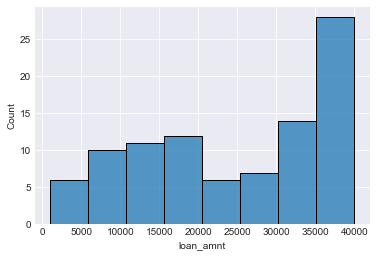

In [18]:
# Plot the histgram for those loan with extremely high annual income and it shows that 
# most of loans locate the between 3,5000 and 40,000
sns.histplot(df_num[df_num['annual_inc']>6.365188e+05]['loan_amnt'])

In [19]:
# From below result, it could be concluded that most of the loan with high incomm does not 
# require to provide second applicant to help them get the loan approved. 
df_num[df_num['annual_inc']>6.365188e+05]['sec_app_fico_range_low'].value_counts(dropna=False)

NaN      90
615.0     1
630.0     1
685.0     1
690.0     1
Name: sec_app_fico_range_low, dtype: int64

Future explore: compare the delinquncy rate between annual income in high group and in the mdedian group. 

##### Dti
Definition: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

The distribution plot and boxplot could not show the DTI clearly, so we want to explore it more

In [20]:
# The maximum debt-to-income ratio will vary by mortgage lender, loan program, and investor, 
# but the number generally ranges between 40-50%.From below result, the max is 999, 
# which is abnormal. 
df_num['dti'].describe()

count    107602.000000
mean         19.648209
std          21.795902
min           0.000000
25%          11.230000
50%          17.670000
75%          25.020000
max         999.000000
Name: dti, dtype: float64

<AxesSubplot:xlabel='dti', ylabel='Count'>

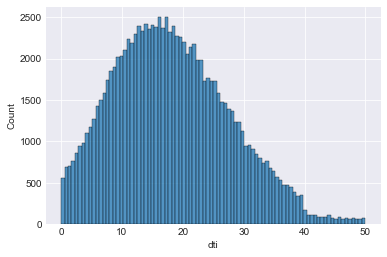

In [21]:
# plot the histgram with dti less than 50 and most of them mainly are on [10,30]
sns.histplot(df_num[df_num['dti']<50]['dti'])

In [22]:
df_num[df_num['dti']<50]['dti'].describe()

count    105735.000000
mean         18.226512
std           9.490400
min           0.000000
25%          11.110000
50%          17.450000
75%          24.560000
max          49.990000
Name: dti, dtype: float64

<AxesSubplot:xlabel='dti', ylabel='Count'>

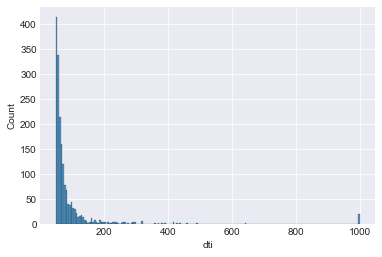

In [23]:
#For the loan with dti greater than 50,the range is very spread
sns.histplot(df_num[df_num['dti']>50]['dti'])

In [24]:
# Subset the loans with dit>= 50 and see if all of them require to have second applicant 
# to help them get loan approved. The answer is yes. 
df_num[df_num['dti']>=50]['sec_app_fico_range_low'].value_counts(dropna=False)

670.0    125
660.0    109
665.0    101
680.0     99
675.0     96
685.0     95
690.0     94
695.0     93
650.0     79
655.0     77
705.0     77
645.0     56
640.0     55
710.0     52
700.0     50
715.0     48
630.0     47
635.0     44
720.0     42
725.0     38
620.0     37
625.0     35
730.0     29
610.0     27
600.0     21
735.0     19
615.0     19
605.0     18
745.0     17
740.0     15
595.0     15
590.0     15
580.0     13
750.0      9
570.0      9
765.0      8
585.0      8
575.0      7
785.0      7
540.0      6
760.0      6
790.0      5
770.0      5
555.0      5
545.0      4
550.0      4
775.0      4
780.0      4
560.0      4
755.0      3
565.0      3
805.0      2
800.0      2
825.0      1
815.0      1
820.0      1
810.0      1
795.0      1
Name: sec_app_fico_range_low, dtype: int64

##### Delinq_2yrs
Definition: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

In [25]:
df_num['delinq_2yrs'].describe()

count    107864.000000
mean          0.223773
std           0.730417
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          20.000000
Name: delinq_2yrs, dtype: float64

<AxesSubplot:xlabel='delinq_2yrs', ylabel='Count'>

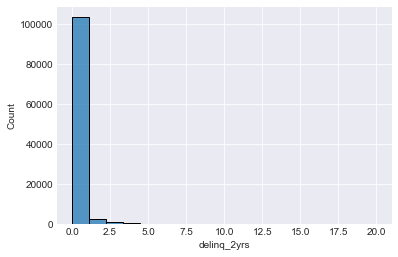

In [26]:
sns.histplot(df_num['delinq_2yrs'])

In [27]:
# From the below result, it shows most of the loans are zero or one time over due for past 2 years.
df_num['delinq_2yrs'].value_counts(dropna=False)

0.0     92407
1.0     10916
2.0      2727
3.0       902
4.0       419
5.0       193
6.0       108
7.0        54
8.0        41
10.0       32
9.0        26
11.0       15
12.0        9
14.0        3
13.0        3
20.0        2
17.0        2
19.0        2
15.0        2
16.0        1
Name: delinq_2yrs, dtype: int64

In [28]:
# Below is the percentage of how many time over due in the total loans for past 2 years 
df_num['delinq_2yrs'].value_counts(dropna=False,normalize=True)*100

0.0     85.669918
1.0     10.120151
2.0      2.528184
3.0      0.836238
4.0      0.388452
5.0      0.178929
6.0      0.100126
7.0      0.050063
8.0      0.038011
10.0     0.029667
9.0      0.024104
11.0     0.013906
12.0     0.008344
14.0     0.002781
13.0     0.002781
20.0     0.001854
17.0     0.001854
19.0     0.001854
15.0     0.001854
16.0     0.000927
Name: delinq_2yrs, dtype: float64

##### Pub_rec
Definition:Number of derogatory public records

A derogatory item is an entry that may be considered negative by lenders because it indicates risk and hurts your ability to qualify for credit or other services. Public records and collections are derogatory items because they reflect financial obligations that were not paid as agreed.

The only type of public record information that would appear on your credit report is a bankruptcy filing., Bankruptcy information is collected and updated regularly from the courts. Filing for bankruptcy is considered derogatory because you are telling all your lenders that you will not be able to pay them in full, or at all.

In [29]:
df_num['pub_rec'].describe()

count    107864.000000
mean          0.163243
std           0.494799
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          52.000000
Name: pub_rec, dtype: float64

In [30]:
# The distribution of  'pub_rec' seems to have similar pattern with ' deling_2yrs', 
# so we cuold explore their relationship in the future to see if there is some pattern 
df_num['pub_rec'].value_counts(dropna=False)

0.0     92595
1.0     13922
2.0       866
3.0       265
4.0       115
5.0        51
6.0        20
7.0        11
8.0         6
9.0         5
13.0        3
10.0        2
52.0        1
19.0        1
24.0        1
Name: pub_rec, dtype: int64

In [31]:
df_num['pub_rec'].value_counts(dropna=False,normalize=True)

0.0     0.858442
1.0     0.129070
2.0     0.008029
3.0     0.002457
4.0     0.001066
5.0     0.000473
6.0     0.000185
7.0     0.000102
8.0     0.000056
9.0     0.000046
13.0    0.000028
10.0    0.000019
52.0    0.000009
19.0    0.000009
24.0    0.000009
Name: pub_rec, dtype: float64

#####  Revol_bal
Definition: Total credit revolving balance

In credit card terms, a revolving balance is the portion of credit card spending that goes unpaid at the end of a billing cycle. The amount can vary, going up or down depending on the amount borrowed and the amount repaid. If you revolve a balance — that is, not pay it off at the end of the month — the lender will charge you for the privilege of borrowing their money. The amount of the charge for revolving a balance will depend on the size of the balance and the interest rate of the card. When the balance is paid off, the customer is no longer revolving the debt.

In [32]:
# there are some severe outliers in this variable
df_num['revol_bal'].describe()

count    107864.000000
mean      16093.382880
std       22176.260283
min           0.000000
25%        5170.000000
50%       10657.000000
75%       19511.250000
max      925589.000000
Name: revol_bal, dtype: float64

<AxesSubplot:xlabel='revol_bal', ylabel='Count'>

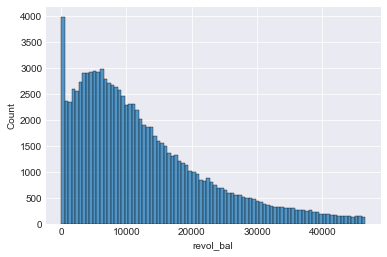

In [33]:
# plot the histgram of 'revol_bal' less than 0.95 pencentile. There are 
sns.histplot(df_num[df_num['revol_bal']< df_num['revol_bal'].quantile(0.95)]['revol_bal'])

In [35]:
df_num[df_num['revol_bal']<100]['revol_bal'].value_counts()

0.0     1254
8.0       22
5.0       20
10.0      18
4.0       18
        ... 
79.0       1
93.0       1
80.0       1
68.0       1
47.0       1
Name: revol_bal, Length: 100, dtype: int64

##### inq_last_6mths

Definition:The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

Background information: 
When you apply for credit, you authorize those lenders to ask or "inquire" for a copy of your credit report from a credit bureau. When you later check your credit report, you may notice that their credit inquiries are listed. The only inquiries that count toward your FICO Scores are the ones that result from your applications for new credit.

It's important to know that there are 2 types of credit inquiries. Soft inquiries such as viewing your own credit report will not affect your FICO Score. Hard inquiries such as actively applying for a new credit card or mortgage will affect your score. Read below to see how much hard inquiries can affect your FICO Score.

In [37]:
# From the below result, the variable of inq_last_6mths should be categorical 
df_num['inq_last_6mths'].value_counts(dropna=False)

0.0    71630
1.0    25578
2.0     7996
3.0     2492
4.0      132
5.0       36
Name: inq_last_6mths, dtype: int64

<AxesSubplot:xlabel='inq_last_6mths', ylabel='Count'>

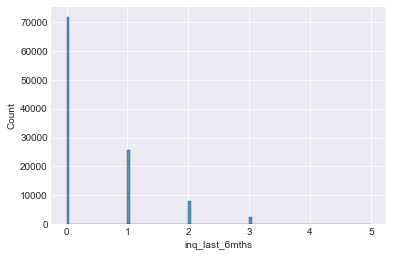

In [38]:
sns.histplot(df_num['inq_last_6mths'])

##### open_acc

Definition: The number of open credit lines in the borrower's credit file.

A trade line is basically a credit card, installment loan or other credit liability that is reported to the credit bureaus and displayed on a credit report.

Credit Trade Line / Approval Bullets:
- Banks usually won’t count a trade line that is less than 12 months old.
- The minimum number of trade lines most lenders find acceptable is 4 open and active trade lines.
- Lenders like to see at least one credit line of $5,000, or all credit lines to total $1,000 or more.

In [42]:
df_num['open_acc'].value_counts(dropna=False)

9.0     8962
8.0     8577
10.0    8398
7.0     8382
11.0    7748
        ... 
61.0       1
54.0       1
58.0       1
56.0       1
51.0       1
Name: open_acc, Length: 63, dtype: int64

<AxesSubplot:xlabel='open_acc', ylabel='Count'>

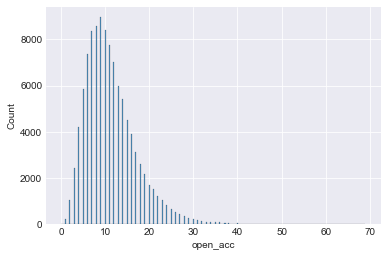

In [43]:
#from the histgram, the distribution of open_acc looks like normal, but right skew. 
sns.histplot(df_num['open_acc'])

### The second group

collections_12_mths_ex_med
mean is:  0.02
std is:  0.14
min is:  0.0
max is:  8.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 0.0
99% quantile value is: 1.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


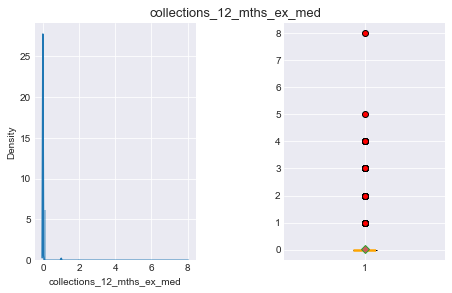

mths_since_last_major_derog
mean is:  46.19
std is:  21.56
min is:  0.0
max is:  226.0
1% quantile value is: 5.0
10% quantile value is: 16.0
90% quantile value is: 74.0
99% quantile value is: 94.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


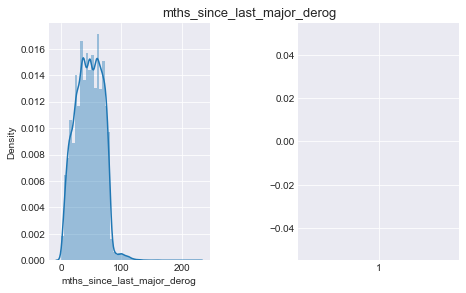

C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


annual_inc_joint
mean is:  125506.63
std is:  66816.65
min is:  18000.0
max is:  1187000.0
1% quantile value is: 36000.0
10% quantile value is: 64600.0
90% quantile value is: 197140.0
99% quantile value is: 360000.0


C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


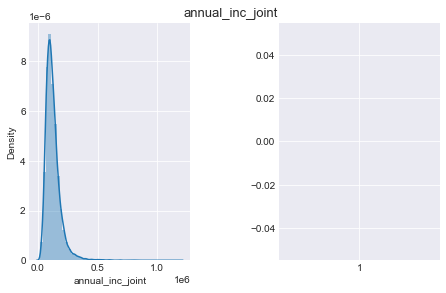

dti_joint
mean is:  19.66
std is:  8.04
min is:  0.0
max is:  39.98
1% quantile value is: 3.3850000000000007
10% quantile value is: 9.35
90% quantile value is: 30.61
99% quantile value is: 38.12700000000001


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


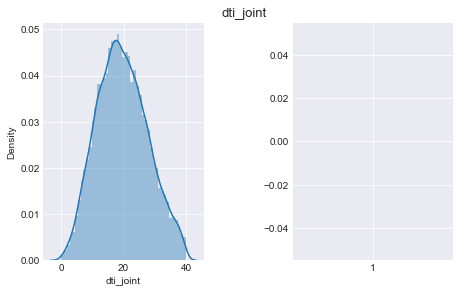

acc_now_delinq
mean is:  0.0
std is:  0.02
min is:  0.0
max is:  1.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 0.0
99% quantile value is: 0.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


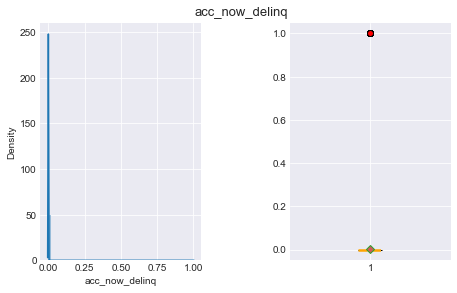

tot_coll_amt
mean is:  293.28
std is:  24813.19
min is:  0.0
max is:  6214661.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 174.0
99% quantile value is: 4128.849999999977


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


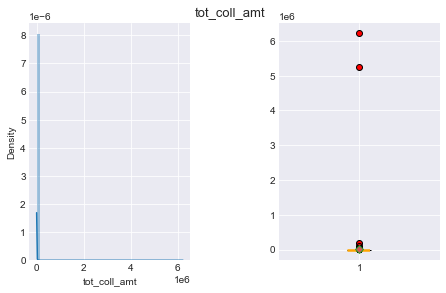

tot_cur_bal
mean is:  143763.18
std is:  167613.33
min is:  0.0
max is:  5752177.0
1% quantile value is: 1144.2600000000002
10% quantile value is: 11395.0
90% quantile value is: 359737.19999999995
99% quantile value is: 707740.8699999993


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


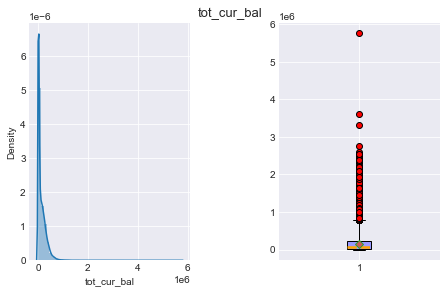

open_acc_6m
mean is:  0.9
std is:  1.12
min is:  0.0
max is:  12.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 2.0
99% quantile value is: 5.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


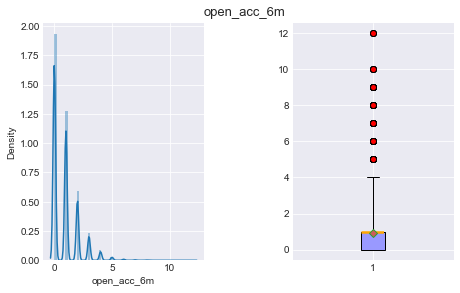

open_act_il
mean is:  2.66
std is:  2.93
min is:  0.0
max is:  41.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 6.0
99% quantile value is: 15.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


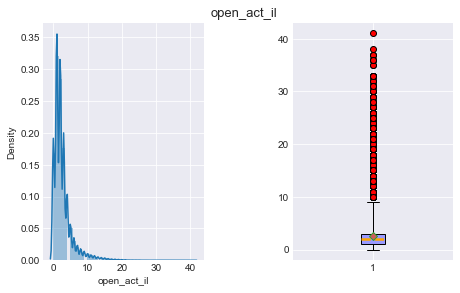

open_il_12m
mean is:  0.65
std is:  0.91
min is:  0.0
max is:  8.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 2.0
99% quantile value is: 4.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


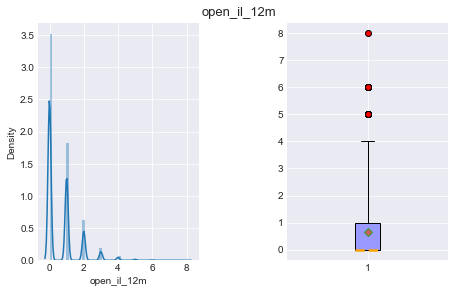

open_il_24m
mean is:  1.49
std is:  1.53
min is:  0.0
max is:  20.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 3.0
99% quantile value is: 7.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


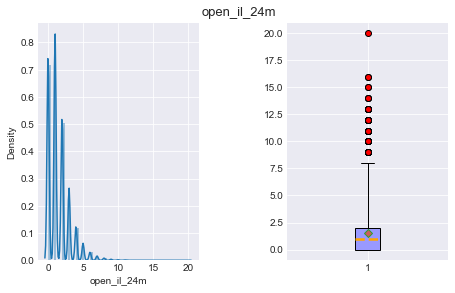

mths_since_rcnt_il
mean is:  21.7
std is:  26.54
min is:  0.0
max is:  507.0
1% quantile value is: 1.0
10% quantile value is: 4.0
90% quantile value is: 45.0
99% quantile value is: 139.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


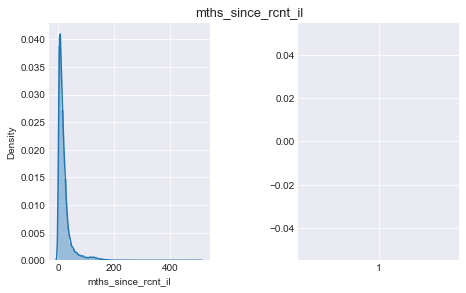

C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


total_bal_il
mean is:  34560.49
std is:  44472.77
min is:  0.0
max is:  995545.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 80357.89999999998
99% quantile value is: 212716.3799999992


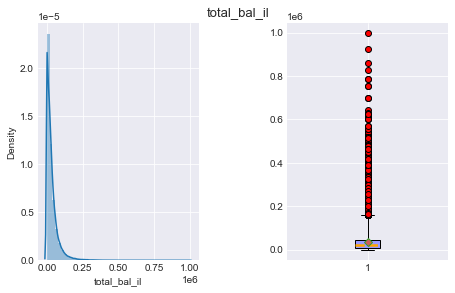

il_util
mean is:  67.61
std is:  24.14
min is:  0.0
max is:  1000.0
1% quantile value is: 6.0
10% quantile value is: 35.0
90% quantile value is: 95.0
99% quantile value is: 119.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


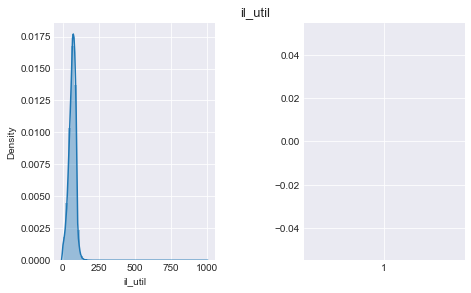

In [46]:
for col in num_variables[13:27]:
    print(col)
    print("mean is: ", round(df[col].mean(),2))
    print("std is: ", round(df[col].std(), 2))
    print("min is: ", df[col].min())
    print("max is: ", df[col].max())
    print("1% quantile value is:", df[col].quantile(.01))
    print("10% quantile value is:", df[col].quantile(.1))
    print("90% quantile value is:", df[col].quantile(.9))
    print("99% quantile value is:", df[col].quantile(.99))
    plt.style.use('seaborn-darkgrid')
    fig, (ax1, ax2) = plt.subplots(1, 2)
    #ax = np.reshape(ax, (1, 2))
    fig.set_size_inches(6, 4)
    fig.subplots_adjust(wspace=.55, left=0.035, right=.985, top=.925, bottom=.1)
    fig.suptitle(col, fontsize=13)
    sns.distplot(df[col], label = "univariate analysis on: " + col, ax=ax1)
    #plt.savefig("figs/univariate_analysis/" + col + ".png")
    #plt.show()
    ax2.boxplot(x = df[col],
                whis = 3,# set extreme ourlier x > Q3+3(Q3-Q1) & X < Q1-3(Q3-Q1)
                patch_artist=True, 
                showmeans=True, # mean: show with point
                boxprops = {'color':'black','facecolor':'#9999ff'}, #set box features
                flierprops = {'marker':'o','markerfacecolor':'red','color':'black'}, # outlier: show with o
                meanprops = {'marker':'D','markerfacecolor':'indianred'}, 
                medianprops = {'linestyle':'--', 'linewidth':2.5, 'color':'orange'}) # medium: show with line
    ax2.tick_params(top='off', right='off')
    #ax2.set_title("BoxPlot on: " + col)
    plt.show()      

In [79]:
df_num['annual_inc'].describe()

count    1.078640e+05
mean     7.854227e+04
std      7.687436e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.500000e+04
75%      9.500000e+04
max      8.365188e+06
Name: annual_inc, dtype: float64

In [48]:
df_num['annual_inc'].mean()

78542.26924998153

In [50]:
df_num['annual_inc'].med`ian()

65000.0

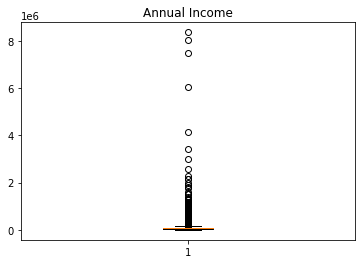

In [54]:
_ = plt.boxplot(df_num['annual_inc'])
_ = plt.title("Annual Income")
plt.show()

<AxesSubplot:ylabel='Density'>

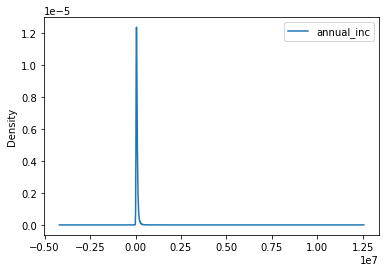

In [56]:
df_num[['annual_inc']].plot.density()

In [50]:
# the maximun of dti is 999, which is weird. 
df['dti'].describe()

count    107602.000000
mean         19.648209
std          21.795902
min           0.000000
25%          11.230000
50%          17.670000
75%          25.020000
max         999.000000
Name: dti, dtype: float64

In [61]:
# subset dti of the loans greater or equal to 95
dti_max = df[df['dti']>=95]
dti_max

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
386,28000.0,28000.0,27975.0,36 months,24.84%,1110.91,E,E3,ICU Unit Clerk,< 1 year,...,Oct-1989,0.0,2.0,18.0,58.3,5.0,27.0,0.0,0.0,64.0
543,12000.0,12000.0,12000.0,36 months,7.34%,372.40,A,A4,NaN,NaN,...,Oct-2010,0.0,2.0,4.0,18.4,2.0,2.0,0.0,0.0,33.0
635,9000.0,9000.0,9000.0,36 months,10.41%,292.15,B,B3,NaN,NaN,...,Apr-1977,0.0,0.0,9.0,37.3,3.0,12.0,0.0,0.0,NaN
660,40000.0,40000.0,40000.0,60 months,10.90%,867.71,B,B4,Loan Processor,4 years,...,Mar-2000,0.0,3.0,12.0,75.5,2.0,24.0,0.0,0.0,NaN
746,40000.0,40000.0,40000.0,36 months,5.31%,1204.42,A,A1,NaN,NaN,...,Mar-1994,1.0,5.0,5.0,24.2,0.0,6.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107418,35000.0,35000.0,35000.0,60 months,10.42%,750.91,B,B3,Sales Rep,< 1 year,...,Aug-1999,0.0,0.0,10.0,76.8,2.0,14.0,0.0,0.0,NaN
107509,28000.0,28000.0,28000.0,60 months,21.45%,764.60,D,D5,Lead Scheduler,< 1 year,...,Feb-2004,0.0,0.0,5.0,99.7,1.0,7.0,0.0,1.0,19.0
107561,13300.0,13300.0,13300.0,60 months,14.08%,310.02,C,C3,NaN,NaN,...,Nov-1992,0.0,3.0,22.0,25.1,1.0,29.0,0.0,0.0,NaN
107703,21875.0,21875.0,21875.0,60 months,14.08%,509.91,C,C3,NaN,NaN,...,May-1991,0.0,2.0,10.0,85.8,1.0,20.0,0.0,0.0,NaN


In [62]:
dti_max[['dti','dti_joint']]

,dti,dti_joint
386,112.20,35.98
543,296.50,10.56
635,129.51,29.08
660,101.46,36.27
746,103.39,11.45
...,...,...
107418,105.25,25.72
107509,117.76,31.38
107561,111.10,33.13
107703,269.88,22.61


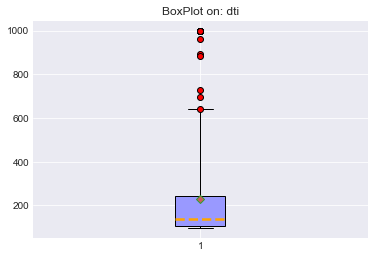

In [63]:

plt.boxplot(x = dti_max['dti'],
                whis = 3,# set extreme ourlier x > Q3+3(Q3-Q1) & X < Q1-3(Q3-Q1)
                patch_artist=True, 
                showmeans=True, # mean: show with point
                boxprops = {'color':'black','facecolor':'#9999ff'}, #set box features
                flierprops = {'marker':'o','markerfacecolor':'red','color':'black'}, # outlier: show with o
                meanprops = {'marker':'D','markerfacecolor':'indianred'}, 
                medianprops = {'linestyle':'--', 'linewidth':2.5, 'color':'orange'}) # medium: show with line
plt.tick_params(top='off', right='off')
plt.title("BoxPlot on: " + 'dti' )
plt.show()

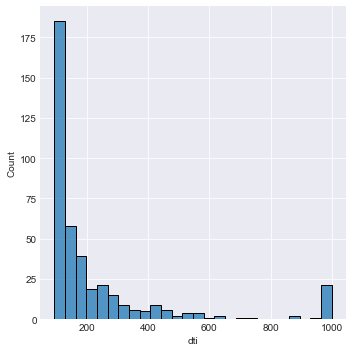

In [65]:
sns.displot(dti_max['dti'], label = "univariate analysis on: " + col)